In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

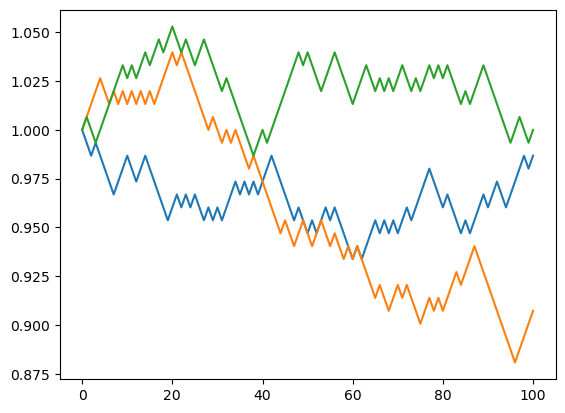

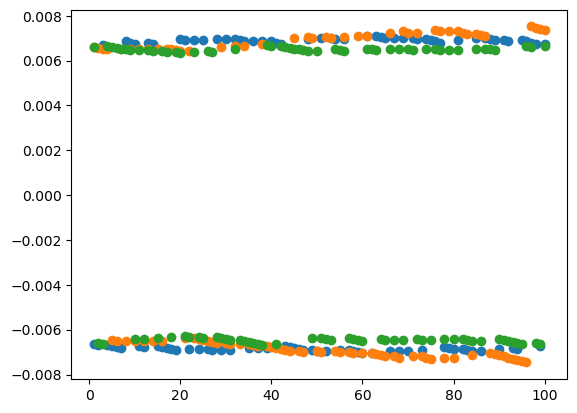

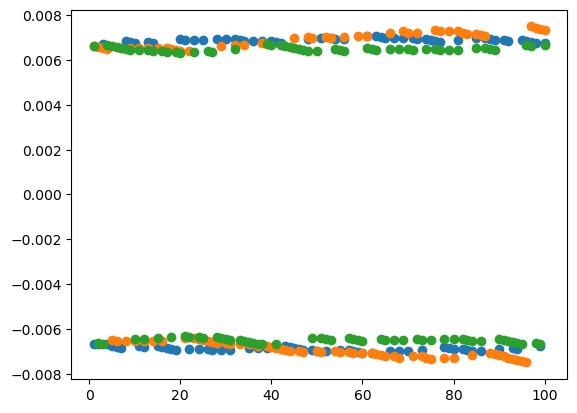

In [59]:
def line_walk(T,line,pos='random',movement=False):
    """
    Simulate a random walk on a line. 
    Function creates a line of a certain size with a particle at an initial position.
    For every timestep the particles moves left, right or stands still with same probability until time T.
    If particle is not allowed to stand still, set movement=True.
    arguments:
    T: integer value (total time steps). Note: takes any value, and converts into a nonnegative int.
    line: integer value (the size of the line). Note: takes any value, and converts into a nonnegative int.
    pos: integer value, float value (function converts it to int), str(random) or str(middle), str(random) by default.
    (determines starting position of particle).
    
    """
    T = np.arange(abs(int(T))) 
    m = np.zeros(abs(int(line)))
    initial_config = m
    
    #We want to determine the starting position of particle. This is random, middle or index on the line.
    if pos == 'random':
        i = r.randint(0,len(m)-1)
    elif pos == 'middle': 
        i = round(len(m)/2) 
    elif (type(pos) == int or type(pos) == float):
        i = round(pos)
        #condition: can't be outside of line.
        if i>(len(m)-1): 
            i = len(m)-1
        elif i<0:
            i = 0
    else:
        return print('Argument Error[pos]: Please plug in a number, "random" or "middle" for the pos argument...\nThis denotes the initial position of the particle.')
    #get particle at position, keep track of position with list
    start=i+1
    m[i]=1    
    particle_pos = [start]
    #We need the particle to randomly move right, left or stand still at each time step.
    for _ in T:
        #Let's first termine whether we want to allow zero movement, False allows zero movement.
        if movement == False:
            move = np.random.randint(-1,2) 
        elif movement == True:
            move = np.random.choice(np.array([-1,1]))
        else:
            return print('Argument Error[movement]: Please assign True or False to the argument movement, which determines whether a movement of 0 places is allowed (if False).')
        #Now make the moves, save moves to list.
        #print('time',dt+1,'--->',m,move)#check progress
        if move>0 and m[i]!=m[len(m)-1]:
            m[i+move]=1
            m[i]=0
            i=i+move
            particle_pos.append(np.where(m==1)[0][0] + 1)
        elif move<0 and m[i]!=m[0]:
            m[i+move]=1
            m[i]=0
            i=i+move
            particle_pos.append(np.where(m==1)[0][0] + 1)
        else:
            particle_pos.append(np.where(m==1)[0][0] + 1)
            pass    
    end = np.where(m==1)[0][0] + 1
    total_displacement = abs(end-start)
    line_walk_dict = {'start':start,
                      'end': end,
                      'displacement': total_displacement, 
                      #'return':ret,
                      'particle_pos_list':np.array(particle_pos)}
    return line_walk_dict

def plot_walks(T,line,pos='random',movement=False,X=1):
    paths = []
    returns = []
    log_returns = []
    for x in np.arange(X):
        d = line_walk(T, line, pos, movement) #pass arguments to obtain a random walk
        p = d['particle_pos_list']/d['particle_pos_list'][0] #path of particle normalized
        #ret
        pt0 = np.roll(p,1) #shift data
        pt0[0] = p[0];     #set equal so we can divide
        
        ret = (p-pt0)/pt0  #return
        ret = np.delete(ret, 0)
        
        log_ret = np.log(p/pt0)
        log_ret = np.delete(log_ret,0)
        paths.append(p)
        returns.append(ret)
        log_returns.append(log_ret)

        time = np.arange(0,len(p))
        plt.plot(time,p)
        #print(w)
    plt.show()
    time = np.delete(time,0)
    for ret in returns:
        plt.scatter(time,ret)
    plt.show()
    for log_ret in log_returns:
        plt.scatter(time,log_ret)
    plt.show()
plot_walks(T=100, line=300, pos='middle', movement=True, X=3)